**Modelo de aprendizado de máquina Zyfra.**

Nesse projeto vamos explorar os dados do campo da mineração de ouro. Vamos preparar um modelo para prever a quantidade de ouro puro extraído do minério de ouro. Os dados estão  armazenados em três arquivos.   

Primeiro passo será importar as bibliotecas necessárias.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from joblib import dump
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

Abaixo li os arquivos com os dados do conjunto de dados de treinamento, do conjunto de dados de teste e do conjunto de dados fonte:

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

A função resumo foi criada para facilitar a apresentação dos dados relevantes de cada tabela.

In [3]:
def resumo(df):
    print(display(df))
    print(df.info())
    print(display(df.describe()))

In [4]:
resumo(df_train)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  flo

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


None


In [5]:
resumo(df_test)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


None


In [6]:
resumo(df_full)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  flo

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


None


Analisando as 3 tabelas ficou claro que elas possuem valores ausentes e valores duplicados. Posteriormente, farei o pré-processamento de dados para lidar com essas questões.      

Nossa primeira demanda é verificar a se a quantidade retirada foi calculada corretamente. Usei o conjunto de treinamento para comparar o EAM (erro médio absoluto) do cálculo da retirada e a característica rougher.output.recovery. Criei uma tabela com as colunas necessárias para essa etapa.    

In [7]:
rougher_train = df_train[['rougher.output.recovery','rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au']]


Aqui tive que retirar os valores nulos. Tentei um método ffill para preencher esses valores, mas ocasionaram em erros.

In [8]:
rougher_train = rougher_train.dropna()

Defini a coluna rougher.output.recovery como target para calcular o EMA. 

In [9]:
target_rougher_train = rougher_train['rougher.output.recovery']


Defini a função de retirada de acordo com o enunciado no processo tecnológico. 

In [10]:
def recovery_func(c,f,t):
    recovery = ((c*(f-t))/(f*(c-t)))*100
    return recovery

Apliquei a função de retirada:
    
    Retirada = ((c*(f-t))/(f*(c-t)))*100

Usando as colunas rougher.output.concentrate_au como C, rougher.input.feed_au como F e rougher.output.tail_au como T.

In [11]:
recovery = recovery_func(rougher_train['rougher.output.concentrate_au'],rougher_train['rougher.input.feed_au'],rougher_train['rougher.output.tail_au'])
recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 14287, dtype: float64

In [12]:
print('EMA:', (mean_absolute_error(target_rougher_train, recovery)))

EMA: 9.303415616264301e-15


O EMA ficou extremamente baixo, sinalizando que os valores calculados ficaram muito próximos aos definidos na coluna target. Tendo confiança nesses dados, podemos seguir o estudo. 

O projeto nos sinaliza, a priori, que algumas características não estão disponíveis no conjunto de teste. A variável 'fora' nos mostra as colunas que não estão presentes na tabela df_test.

In [13]:
train_columns = df_train.columns
test_columns = df_test.columns


In [14]:
fora = train_columns[~train_columns.isin(test_columns)]
fora 

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

Podemos ver que as colunas faltantes se referem aos parâmetros Output e Calculation. 

Aqui realizei o pré-processamento de dados. Usei o drop_duplicates() para retirar as linhas duplicadas nos dataframes. Também usei fillna com metódo ffill para substituir os valores nulos. Esse método substitui os valores nulos repetindo o valor anterior válido da coluna.

In [15]:
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()
df_full = df_full.drop_duplicates()

In [16]:
df_train_median = df_train.median()
df_test_median = df_test.median()
df_full_median = df_full.median()

In [17]:
df_train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [18]:
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')
df_full = df_full.fillna(method='ffill')

Para facilitar outras analises defini a coluna Date como índice das tabelas. 

In [19]:
df_train = df_train.set_index('date')
df_test = df_test.set_index('date')
df_full = df_full.set_index('date')

In [20]:
df_train.index.names = [None]
df_test.index.names = [None]
df_full.index.names = [None]

Defini as funções abaixo para retirar possíveis outliers dos dados, determinando limites superiores e inferiores.

In [21]:
def outliers_superior(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    superior = Q3+(1.5*IQR)
    return superior
    

In [22]:
def outliers_inferior(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    inferior = Q1-(1.5*IQR)
    return inferior

2.1 Vamos obeservar como a concentração de metais (Au, Ag, Pb) muda dependendo do estágio de purificação.

Começamos com Ag:

In [23]:
df_train[['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']].mean()

rougher.input.feed_ag                     7.803825
rougher.output.concentrate_ag            10.541930
primary_cleaner.output.concentrate_ag     7.390585
final.output.concentrate_ag               4.699066
dtype: float64

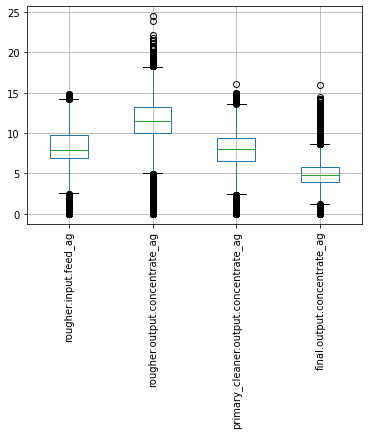

In [24]:
df_train[['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']].boxplot()
plt.xticks(rotation=90)
plt.show()

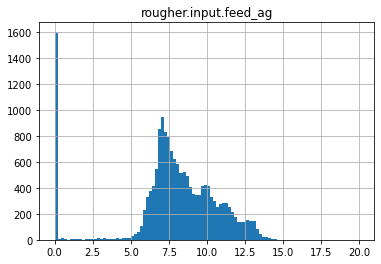

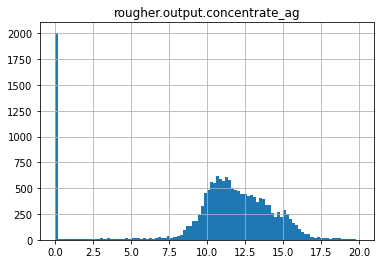

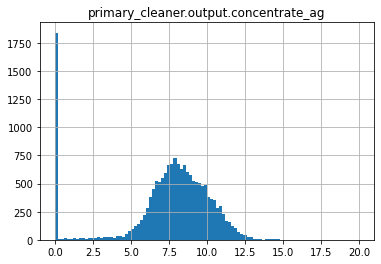

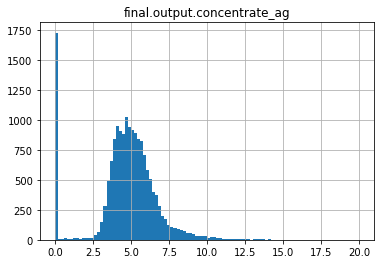

In [25]:
df_train.hist('rougher.input.feed_ag',bins=100, range=(0,20))
plt.show()
df_train.hist('rougher.output.concentrate_ag',bins=100, range=(0,20))
plt.show()
df_train.hist('primary_cleaner.output.concentrate_ag',bins=100, range=(0,20))
plt.show()
df_train.hist('final.output.concentrate_ag',bins=100, range=(0,20))
plt.show()

Vemos que a concentração de Ag se altera pouco ao longo dos estágios de purificação. Vemos um aumento após o estágio de flotação. Entretanto, ela cai após a primeira e segunda etapa do processo de purificação. 

Concentração Au:

In [26]:
df_train[['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']].mean()

rougher.input.feed_au                     7.144279
rougher.output.concentrate_au            17.337662
primary_cleaner.output.concentrate_au    29.041786
final.output.concentrate_au              39.321631
dtype: float64

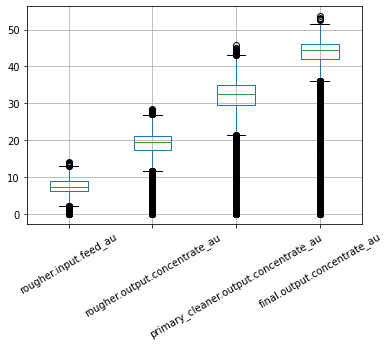

In [27]:
df_train[['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']].boxplot()
plt.xticks(rotation=30)
plt.show()

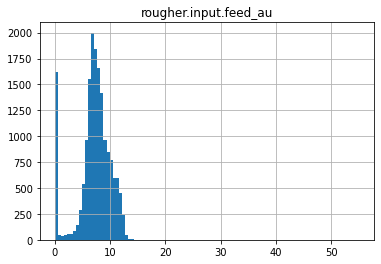

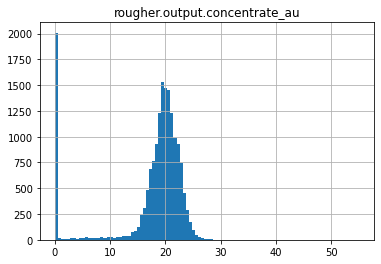

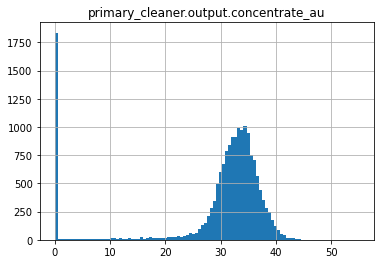

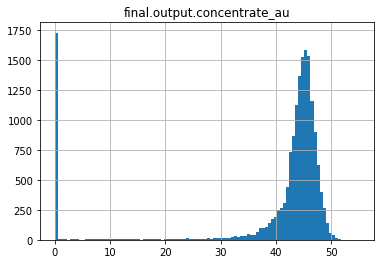

In [28]:
df_train.hist('rougher.input.feed_au',bins=100, range=(0,55))
plt.show()
df_train.hist('rougher.output.concentrate_au',bins=100, range=(0,55))
plt.show()
df_train.hist('primary_cleaner.output.concentrate_au',bins=100, range=(0,55))
plt.show()
df_train.hist('final.output.concentrate_au',bins=100, range=(0,55))
plt.show()

Já no processo de purificação de Au percebe-se um nítido aumento. Na média a concentração de ouro passa de 7.1 para 39.2, após a finalização e todos os processos de purificação. A distribuição dos gráficos nos leva a mesma conclusão explanada.

Concentração Pb:

In [29]:
df_train[['rougher.input.feed_pb','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']].mean()

rougher.input.feed_pb                    3.188803
rougher.output.concentrate_pb            6.861249
primary_cleaner.output.concentrate_pb    8.493673
final.output.concentrate_pb              9.080638
dtype: float64

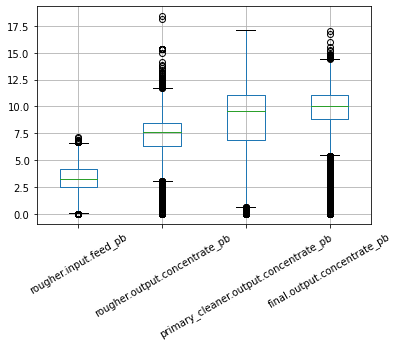

In [30]:
df_train[['rougher.input.feed_pb','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']].boxplot()
plt.xticks(rotation=30)
plt.show()

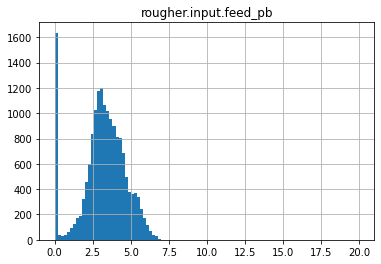

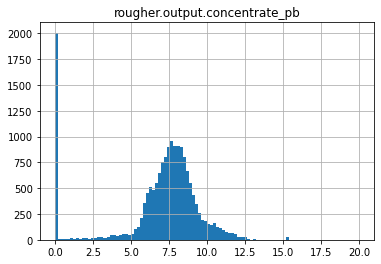

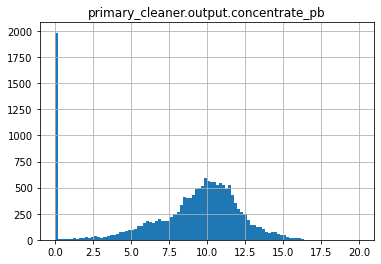

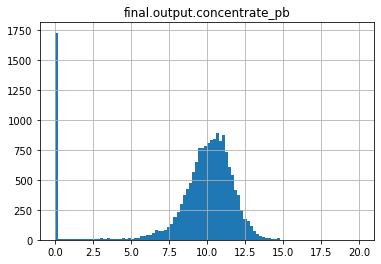

In [31]:
df_train.hist('rougher.input.feed_pb',bins=100, range=(0,20))
plt.show()
df_train.hist('rougher.output.concentrate_pb',bins=100, range=(0,20))
plt.show()
df_train.hist('primary_cleaner.output.concentrate_pb',bins=100, range=(0,20))
plt.show()
df_train.hist('final.output.concentrate_pb',bins=100, range=(0,20))
plt.show()

Assim como aconteceu com Au, Pb também aumenta sua concentração depois dos processos de purificação. Entretanto, esse incremento não é tão forte como o visto no Au. Ele passa na média de 3.2 para 9. 

2.2 Compare as distribuições de tamanho de partícula de minério no conjunto de treinamento e no conjunto de teste. Se as distribuições variarem significativamente, a avaliação do modelo estará incorreta.

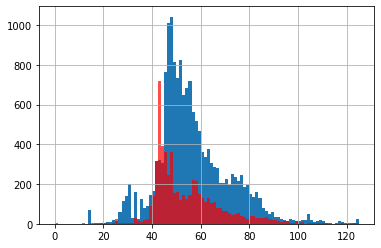

In [32]:
df_train['rougher.input.feed_size'].hist(bins=100, range=(0,125))
df_test['rougher.input.feed_size'].hist(bins=100, range=(0,125),color='red',alpha = 0.7)
plt.show()


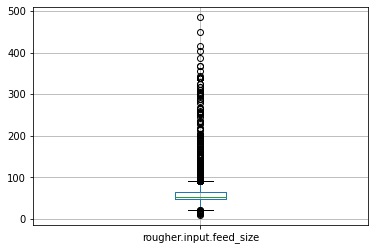

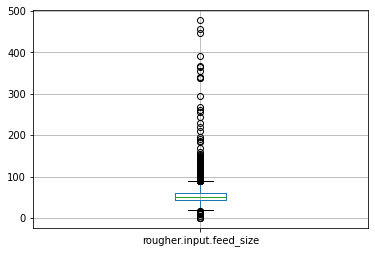

In [33]:
df_train.boxplot(['rougher.input.feed_size'])
plt.show()
df_test.boxplot(['rougher.input.feed_size'])
plt.show()

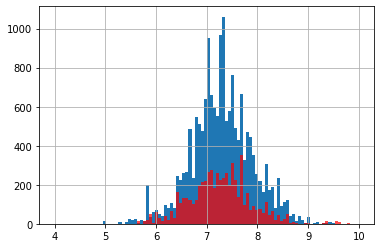

In [34]:
df_train['primary_cleaner.input.feed_size'].hist(bins=100, range=(4,10),alpha = 1)
df_test['primary_cleaner.input.feed_size'].hist(bins=100, range=(4,10),color='red',alpha = 0.7)
plt.show()

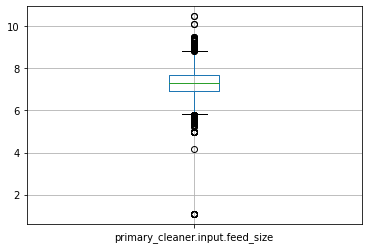

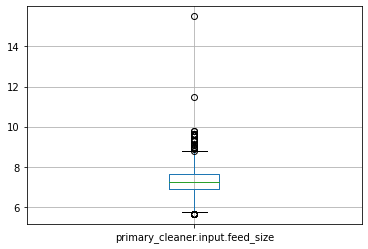

In [35]:
df_train.boxplot(['primary_cleaner.input.feed_size'])
plt.show()
df_test.boxplot(['primary_cleaner.input.feed_size'])
plt.show()

Comparando as distribuições de tamanho de partícula de minério no conjunto de treinamento e no conjunto de teste, pude notar que elas possuem o mesmo comportamento não percebendo grandes variâncias. 

2.3. Considere as concentrações totais de todas as substâncias em diferentes estágios: minério bruto, concentrado bruto e concentrado final. Você percebe algum valor anormal na distribuição total? Se você fizer isso, vale a pena remover esses valores de ambas as amostras? Descreva os resultados e elimine as anomalias.

Minério Bruto Total 

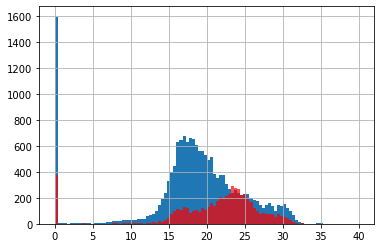

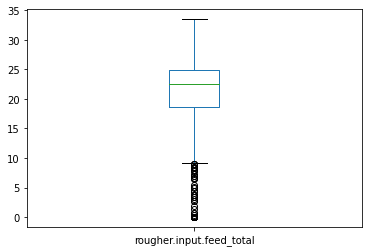

In [36]:
df_train['rougher.input.feed_total'] = df_train['rougher.input.feed_pb']+df_train['rougher.input.feed_ag']+df_train['rougher.input.feed_au']
df_train['rougher.input.feed_total'].hist(bins=100, range=(0,40),alpha = 1)
df_test['rougher.input.feed_total'] = df_test['rougher.input.feed_pb']+df_test['rougher.input.feed_ag']+df_test['rougher.input.feed_au']
df_test['rougher.input.feed_total'].hist(bins=100, range=(0,40),color='red',alpha = 0.7)
plt.show()
df_test['rougher.input.feed_total'].plot.box()
plt.show()

In [37]:
df_train = df_train.loc[df_train['rougher.input.feed_total']>outliers_inferior(df_train['rougher.input.feed_total'])]
df_train = df_train.loc[df_train['rougher.input.feed_total']<outliers_superior(df_train['rougher.input.feed_total'])]
df_test = df_test.loc[df_test['rougher.input.feed_total']>outliers_inferior(df_test['rougher.input.feed_total'])]
df_test = df_test.loc[df_test['rougher.input.feed_total']<outliers_superior(df_test['rougher.input.feed_total'])]

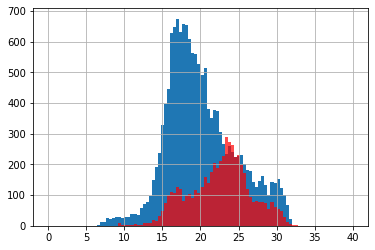

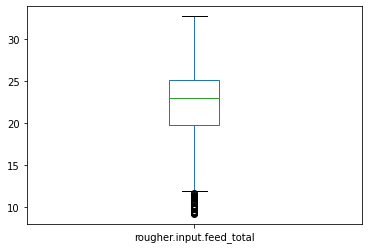

In [38]:
df_train['rougher.input.feed_total'] = df_train['rougher.input.feed_pb']+df_train['rougher.input.feed_ag']+df_train['rougher.input.feed_au']
df_train['rougher.input.feed_total'].hist(bins=100, range=(0,40),alpha = 1)
df_test['rougher.input.feed_total'] = df_test['rougher.input.feed_pb']+df_test['rougher.input.feed_ag']+df_test['rougher.input.feed_au']
df_test['rougher.input.feed_total'].hist(bins=100, range=(0,40),color='red',alpha = 0.7)
plt.show()
df_test['rougher.input.feed_total'].plot.box()
plt.show()

Concentrado Bruto Total 

<AxesSubplot:>

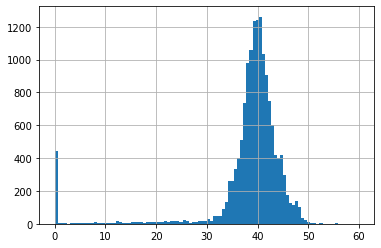

In [39]:
df_train['rougher.output.concentrate_total'] = df_train['rougher.output.concentrate_pb']+df_train['rougher.output.concentrate_ag']+df_train['rougher.output.concentrate_au']
df_train['rougher.output.concentrate_total'].hist(bins=100, range=(0,60),alpha = 1)

In [40]:
df_train = df_train.loc[df_train['rougher.output.concentrate_total']>outliers_inferior(df_train['rougher.output.concentrate_total'])]
df_train = df_train.loc[df_train['rougher.output.concentrate_total']<outliers_superior(df_train['rougher.output.concentrate_total'])]


<AxesSubplot:>

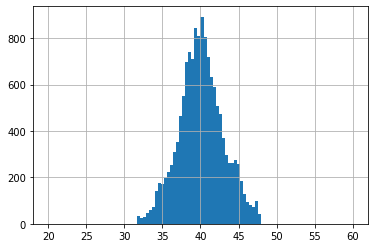

In [41]:
df_train['rougher.output.concentrate_total'] = df_train['rougher.output.concentrate_pb']+df_train['rougher.output.concentrate_ag']+df_train['rougher.output.concentrate_au']
df_train['rougher.output.concentrate_total'].hist(bins=100, range=(20,60),alpha = 1)

Concentrado Final total

<AxesSubplot:>

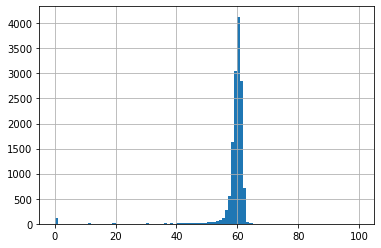

In [42]:
df_train['final.output.concentrate_total'] = df_train['final.output.concentrate_pb']+df_train['final.output.concentrate_au']+df_train['final.output.concentrate_ag']
df_train['final.output.concentrate_total'].hist(bins=100, range=(0,100),alpha = 1)

In [43]:
df_train = df_train.loc[df_train['final.output.concentrate_total']>outliers_inferior(df_train['final.output.concentrate_total'])]
df_train = df_train.loc[df_train['final.output.concentrate_total']<outliers_superior(df_train['final.output.concentrate_total'])]


<AxesSubplot:>

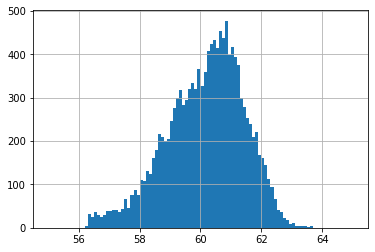

In [44]:
df_train['final.output.concentrate_total'] = df_train['final.output.concentrate_pb']+df_train['final.output.concentrate_au']+df_train['final.output.concentrate_ag']
df_train['final.output.concentrate_total'].hist(bins=100, range=(55,65),alpha = 1)

Nessa tarefa, primeiramente somei as concentrações de todas as substâncias nos estágios distintos. Depois gerei os gráficos para estudar possíveis anomalias. Vi que em todos os estágios havia a presença de outliers. Utilizei o método de determinar limites superiores e inferiores e excluir os dados fora desse intervalo. Apliquei a técnica para todas as distribuições, tirando os outliers do estudo no conjunto de teste e treinamento. 

3. Construir o modelo

Comecei retirando da tabela treino colunas adicionadas anteriormente que não serão mais necessárias. 

In [45]:
df_train = df_train.drop(['rougher.input.feed_total','rougher.output.concentrate_total','final.output.concentrate_total'],axis=1)

Abaixo defini a função que calcula o sMAPE:

In [46]:
def smape_x(target,predictions):
    n = len(predictions)
    som = 0
    for i in range(0,n):
        som+= (abs(target[i]-predictions[i]))/(((abs(target[i]) + abs(predictions[i]))/2))
    smape = som / n *100 
    return smape

sMAP final:

In [47]:
def final_smape(smape_1, smape_2):
    f_smape = (smape_1 * 25 / 100) + (smape_2 * 75 / 100)
    f_smape = abs(f_smape)
    print('Final SMAPE score is equal to:', f_smape.round(3), '%')
    return f_smape

Para treinar o modelo é necessário dividir as tabela em objetivo (target) e características (features) 

In [48]:
target_train = df_train[['rougher.output.recovery','final.output.recovery']]
target_train
features_train = df_train.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
features_train

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,10.507046,0.953716,16.208849,2.257889,123.819808,11.316280,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,10.422762,0.883763,16.532835,2.146849,122.270188,11.322140,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,10.360302,0.792826,16.525686,2.055292,117.988169,11.913613,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,8.769645,3.141541,10.403181,1.529220,123.381787,8.028927,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,8.897321,3.130493,10.549470,1.612542,120.878188,7.962636,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,8.529606,2.911418,11.115147,1.596616,105.666118,7.955111,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,8.777171,2.819214,10.463847,1.602879,98.880538,7.984164,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [49]:
df_test_model = df_full.loc[df_test.index]
df_test_model = df_test_model.fillna(method='ffill')


Como a tabela de teste não possui as variáveis usada como target. Precisei "puxar" esses valores da tabela full nos índices existentes na tabela teste. Esse passo é essencial para testar nosso modelo. 

In [50]:
target_test = df_test_model[['rougher.output.recovery','final.output.recovery']]
features_test = df_test_model.drop(['rougher.output.recovery','final.output.recovery'],axis=1)   

Treinei modelos diferentes de regressão, avaliando cada um com validação cruzada.

Regressão de Árvore de Decisão  

In [51]:
model_tree = DecisionTreeRegressor(random_state=54321)
scores = cross_val_score(model_tree, features_train, target_train, cv=5) 
final_score = scores.mean()
final_score

0.5504577369199927

Regressão Linear

In [52]:
model_linear = LinearRegression()
scores = cross_val_score(model_linear, features_train, target_train, cv=5) 
final_score = scores.mean()
final_score

0.7245785396957084

Regressão Floresta Aleatória   

In [53]:
model_forest = RandomForestRegressor(random_state=54321,n_estimators=2)
scores = cross_val_score(model_forest, features_train, target_train, cv=5) 
final_score = scores.mean()
final_score

0.688626845865116

Dos modelos analisados o Regressão Linear e Regressão Floresta Aleatória tiveram os maiores scores e por isso foram os escolhidos para serem testados.

Regressão Linear

In [54]:
model_linear.fit(features_train,target_train['rougher.output.recovery'])
predictions_test_rougher = model_linear.predict(features_test)

In [74]:
model_linear.fit(features_train,target_train['final.output.recovery'])
predictions_test_final_linear = model_linear.predict(features_test)

In [56]:
final_smape(smape_x(target_test['rougher.output.recovery'],predictions_test_rougher), smape_x(target_test['final.output.recovery'],predictions_test_final_linear))

Final SMAPE score is equal to: 5.758 %


5.758280283943875

Regressão Floresta Aleatória   

In [57]:
model_forest.fit(features_train,target_train['rougher.output.recovery'])
predictions_test_rougher = model_forest.predict(features_test)

In [58]:
model_forest.fit(features_train,target_train['final.output.recovery'])
predictions_test_final = model_forest.predict(features_test)

In [59]:
final_smape(smape_x(target_test['rougher.output.recovery'],predictions_test_rougher), smape_x(target_test['final.output.recovery'],predictions_test_final))

Final SMAPE score is equal to: 4.896 %


4.89646929136042

O modelo que obeteve o menor valor sMAPE foi o Regressão Floresta Aleatória.

Podemos concluir que o modelo de Regressão Floresta Aleatória apresentou o menor valor final sMAPE. Isso significa que este modelo tem o menor erro percentual absoluto médio simetrico. Por isso, foi escolhido por ter a melhor performance.
